In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
train.head()
# 28x28 pixel data which gives us 784 pixels data
test = pd.read_csv("test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#generating xtrain,ytrain from train data
xtrain = train.drop(columns = ["label"]).values
ytrain = train["label"].values
xtest = test.values

In [4]:
xtrain.shape

(42000, 784)

In [5]:
ytrain.shape

(42000,)

In [6]:
xtest.shape

(28000, 784)

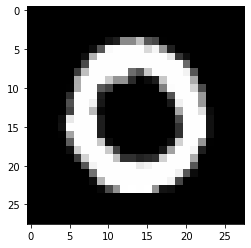

In [7]:
plt.imshow(xtrain[1].reshape(28,28), cmap = "gray")

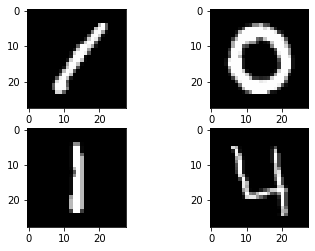

In [8]:
for i in  range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(xtrain[i].reshape(28,28), cmap = "gray")

#### Scaling the data with Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
sc_xtrain = sc.transform(xtrain)
sc_xtest = sc.transform(xtest)

####  PCA  transformation of the Data

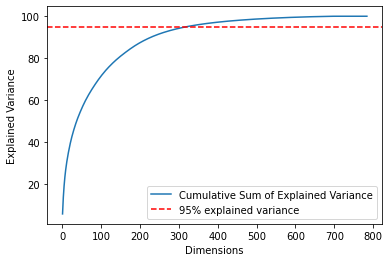

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(sc_xtrain)
val = np.cumsum(pca.explained_variance_ratio_) * 100
plt.plot(range(1, len(val)+1), val, label = "Cumulative Sum of Explained Variance")
plt.axhline(y =  95, color = "r", linestyle = "--", label = "95% explained variance")
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.legend()

In [11]:
pca = PCA(n_components = 0.95)
pca.fit(sc_xtrain)
pca_xtrain = pca.transform(sc_xtrain)
pca_xtest = pca.transform(sc_xtest)
print("Selected Components :", pca.n_components_)

Selected Components : 320


### Visualizing Data Before PCA and After PCA

Text(0.5, 1.0, 'Data after PCA')

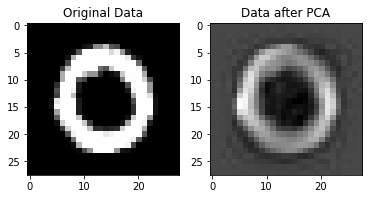

In [18]:
data_point = xtrain[1].reshape(28,28)
pca_data_point = pca.inverse_transform(pca_xtrain[1]).reshape(28,28) #to visualize the data in a picture format after pca so we use inverse_transform
plt.subplot(1,2,1)
plt.imshow(data_point, cmap = "gray")
plt.title("Original Data")
plt.subplot(1,2,2)
plt.imshow(pca_data_point, cmap = "gray")
plt.title("Data after PCA")

### Classification of Handwritten Digits data using Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
start_time = datetime.datetime.now()
model.fit(pca_xtrain, ytrain)
end_time = datetime.datetime.now()
print("Time Taken By Model To Train Data Is: ", str(end_time - start_time))

Time Taken By Model To Train Data Is:  0:00:07.569651


C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
start_time = datetime.datetime.now()
ypred = model.predict(pca_xtrain)
end_time = datetime.datetime.now()
print("Time Taken By Model To Predict the O/P on Test Data Is: ", str(end_time - start_time))

Time Taken By Model To Predict the O/P on Test Data Is:  0:00:00.055946


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
accuracy_score(ytrain,ypred)

0.9383333333333334

In [29]:
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4132
           1       0.97      0.98      0.97      4684
           2       0.93      0.93      0.93      4177
           3       0.92      0.91      0.92      4351
           4       0.95      0.94      0.94      4072
           5       0.91      0.90      0.90      3795
           6       0.96      0.97      0.96      4137
           7       0.95      0.94      0.95      4401
           8       0.91      0.90      0.91      4063
           9       0.92      0.92      0.92      4188

    accuracy                           0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000



<AxesSubplot:>

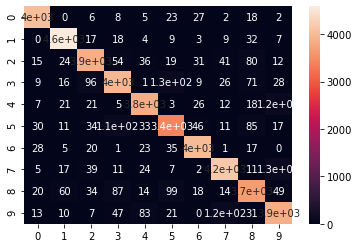

In [32]:
sns.heatmap(confusion_matrix(ytrain,ypred), annot = True)

In [33]:
start_time = datetime.datetime.now()
ypred = model.predict(pca_xtest)
end_time = datetime.datetime.now()
print("Time Taken By Model To Predict the O/P on Test Data Is: ", str(end_time - start_time))

Time Taken By Model To Predict the O/P on Test Data Is:  0:00:00.040976


In [37]:
output = pd.DataFrame(ypred, columns = ["label"])
output.to_csv("submission.csv")